In [1]:
%matplotlib inline
from CartPole import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn import linear_model
import math

# Task 4
## Defining action as non-linear combination of system state variables

In [2]:
n=500
no_RBC = 5
x_train, y_train, x_test, y_test = generate_data(n) # TODO change these to values more evenly spaced
index_to_variable = {0 : 'cart_location', 1 : 'cart_velocity', 2 : 'pole_angle', 3 : 'pole_velocity', 4 : 'action'}

w_i_start = np.array([np.random.uniform(-1,1) for i in range(no_RBC)])
W_ = np.random.uniform(-1,1,(4,4))
W_start = np.matmul(W_.T,W_) # This is to ensure it is symmetric
X_i_vals = x_train[np.random.randint(0,n*0.8,len(w_i_start))]

In [3]:
w_i_start

array([ 1.63092551e-01, -6.32584451e-04, -7.54628794e-01, -6.81970456e-01,
        1.63563530e-01])

In [4]:
kwargs_ = {'linear':False, 'w_i':w_i_start, 'X_i_vals':X_i_vals, 
           'W':W_start, 'parameter_to_be_optimised': 'w_i', 
           'model_predictive_control':False}

w_i = scipy.optimize.minimize(training_loss, w_i_start, 
                        args=(x_train, kwargs_))['x']
w_i

array([-6.35711372e+03, -6.32584451e-04, -7.54628794e-01, -6.81970456e-01,
        1.63563530e-01])

In [5]:
# w_i = [-2.37303189e-09, -8.83855574e-05, -9.36626028e-05, -8.40484382e-05]
kwargs_ = {'linear':False, 'w_i':w_i, 'X_i_vals':X_i_vals, 
           'W':W_start, 'parameter_to_be_optimised': 'W',
          'model_predictive_control':False}

W = scipy.optimize.minimize(training_loss, W_start, 
                        args=(x_train, kwargs_))['x']

W = np.reshape(W, (-1, 4))
W

C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
D:\OneDrive - University of Cambridge\11A\SF3_Project\CartPole.py:574: RuntimeWarning: overflow encountered in double_scalars
  return 20 * np.tanh(np.sum(np.array([w_i[i] * policy_exponent(X, X_i_vals[i], W) for i in range(int(w_i.size/4))]))) #TODO vectorise this
C:\Users\Jordan\Anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


array([[-1.50782191e+01,  3.35690801e+02,  1.83976315e+03,
         3.42359307e+02],
       [ 3.35690801e+02,  2.58468715e+00, -3.86492139e+02,
        -7.86329294e+01],
       [ 1.83976315e+03, -3.86492139e+02, -5.31112925e+03,
        -8.59177516e+02],
       [ 3.42359307e+02, -7.86329294e+01, -8.59177516e+02,
        -1.27954199e+02]])

In [6]:
W = np.array([[ 1.50918096,  0.58386435, -0.84052149,  0.03404978],
       [ 0.58386435, -0.64206911,  0.76192208, -0.18924572],
       [-0.84052149,  0.76192208,  1.11448343,  1.72721012],
       [ 0.03404978, -0.18924572,  1.72721012,  1.20218808]])

w_i = np.array([ 3.48555800e+02, -6.37890203e-01, -7.06130398e-02, -2.73892480e-01,
       -6.94948167e-01])

In [7]:
def project_rollout_non_linear_policy(initial_x, steps=1, **kwargs):
    
    cp = CartPole()
    cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_x.copy()
    x_ = initial_x.copy()
    x_history = [x_]
    
    for step in range(steps):
        action_ = 20 * math.tanh((non_linear_policy(kwargs['w_i'], x_, kwargs['X_i_vals'], kwargs['W'])))
        print(action_)
        cp.performAction(action_)
        x_ = np.array([cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity])
        x_history.append(x_)
        
    return x_history

6.647963277832775e-26
1.963835553532429e-34
2.938142889739197e-64
1.369040161787992e-141
7.197100143183961e-169
2.3418975296905452e-119
2.5548333596749053e-87
1.5209357808061e-58
1.3743667601706894e-17
20.0


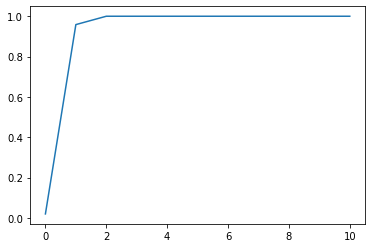

In [8]:
steps = 10
x_history = project_rollout_non_linear_policy(np.array([0,0,0.1,0]), steps=steps, w_i=w_i, X_i_vals=X_i_vals, W=W)
plt.plot([i for i in range(len(x_history))], [loss(x_) for x_ in x_history])

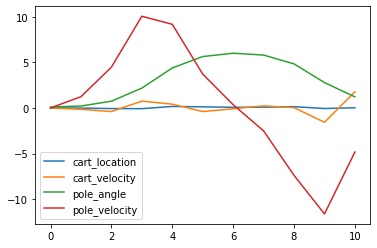

In [9]:
fig, ax = plt.subplots(1, 1)

for i in [0,1,2,3]:
    ax.plot([i for i in range(steps+1)], [x[i] for x in x_history], label=index_to_variable[i])
ax.legend()
